In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov  5 10:32:26 2021

@author: nvana
"""
from halotools.empirical_models import HodModelFactory
from halotools.empirical_models import TrivialPhaseSpace, ZuMandelbaum15Cens, ZuMandelbaum15Sats, \
                                        Leauthaud11Cens, Leauthaud11Sats, Zheng07Cens, Zheng07Sats, \
                                        NFWPhaseSpace, SubhaloPhaseSpace
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace, Tinker13Cens, Tinker13QuiescentSats, \
                                        TrivialProfile, Tinker13ActiveSats
from halotools_ia.ia_models.ia_model_components import CentralAlignment, RandomAlignment, RadialSatelliteAlignment, \
                                                        HybridSatelliteAlignment, MajorAxisSatelliteAlignment, SatelliteAlignment, \
                                                        SubhaloAlignment
from halotools_ia.ia_models.ia_strength_models import RadialSatelliteAlignmentStrengthAlternate

from halotools.mock_observables import tpcf

from halotools.sim_manager import HaloTableCache
from halotools.sim_manager import CachedHaloCatalog
from halotools_ia.correlation_functions import ed_3d, ee_3d

from halotools.utils import crossmatch

import emcee
import numpy as np
import os
import corner
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

def mask_bad_halocat(halocat):
    bad_mask = (halocat.halo_table["halo_axisA_x"] == 0) & (halocat.halo_table["halo_axisA_y"] == 0) & (halocat.halo_table["halo_axisA_z"] == 0)
    halocat._halo_table = halocat.halo_table[ ~bad_mask ]

In [2]:
base = "subhalo_full_results{}"
path_1 = os.path.join(base.format(str(1)),"MCMC_{}.h5")
path_2 = os.path.join(base.format(str(2)),"MCMC_{}.h5")
path_3 = os.path.join(base.format(str(3)),"MCMC_{}.h5")

In [3]:
print(os.path.exists( path_1.format(1) ))
print(os.path.exists( path_2.format(1) ))
print(os.path.exists( path_3.format(1) ))

True
True
True


## Sample_1

In [4]:
f_name = path_1

In [5]:
readers = []
chains = []
discard = 500
probs = []

runs = 15

for i in range(runs):
    try:
        reader = emcee.backends.HDFBackend( os.path.join(f_name.format(i+1)) )
        chains.append( reader.get_chain(discard=discard, flat=True) )
        probs.append( reader.get_log_prob(discard=discard, flat=True) )
        readers.append( reader )
    except:
        pass
    
flat = np.vstack( chains )
print(len(flat))
#np.save("1HaloParams.npy", res)
sat_str, cen_str = np.mean( flat, axis=0 )
#a = np.mean( flat )
probs = np.hstack(probs)

N = reader.shape[0]

234405


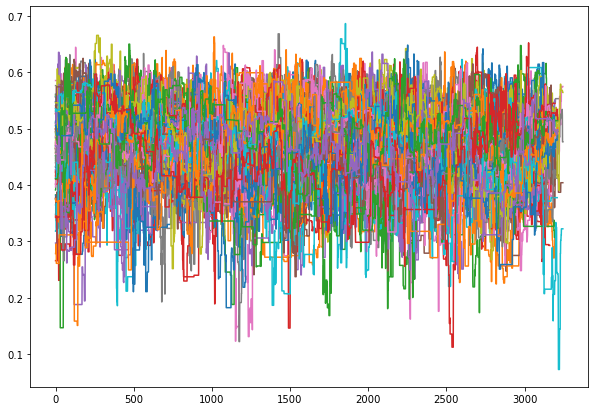

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 7), sharex=True)
#plt.xlim([0,500])

run_num = -1

for run in chains:
    run_num += 1
    for i in range(N):
        single_walker = run[i::N]
        ax.plot(single_walker[:, 0], alpha=1)


Satellite Alignment Strength
0.4871458987068068


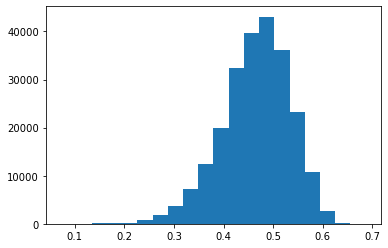

In [7]:
view = flat[:,0]
counts,edges,toss=plt.hist(view,bins=20)
val = max(counts)
ind = np.where( counts == val )[0][0]
print( "Satellite Alignment Strength" )
print( ( edges[ind] + edges[ind+1] )/2 )

Central Alignment Strength
0.7859769845845912


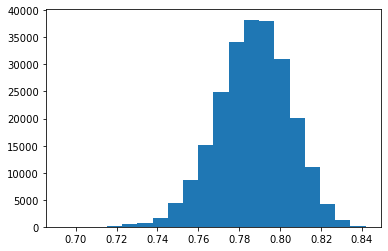

In [8]:
view = flat[:,1]
counts,edges,toss=plt.hist(view,bins=20)
val = max(counts)
ind = np.where( counts == val )[0][0]
print( "Central Alignment Strength" )
print( ( edges[ind] + edges[ind+1] )/2 )

In [9]:
highest = np.max(probs)
ind = 0
for i in range(len(probs)):
    ind = i
    if probs[i] == highest:
        break
print("Matching: ", sum( probs == probs[ind] ))
inds = (probs == probs[ind])
print(probs[ind])
print( np.mean( flat[inds], axis=0 ) )

Matching:  76
-6.376894858338554
[0.44925405 0.80215199]


In [10]:
mpl.rcParams["xtick.labelsize"] = 15
mpl.rcParams["ytick.labelsize"] = 15
mpl.rcParams["axes.labelsize"] = 15

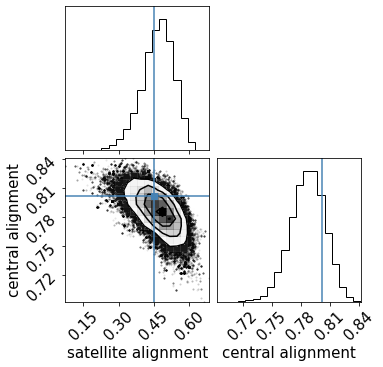

In [11]:
fig = corner.corner(
    #flat, labels=["a","gamma"]
    #flat, labels=["a"]
    flat, labels=["satellite alignment","central alignment"], truths = flat[inds][0]
);

fig.savefig("Sample_1_corner.pdf",dpi=500)

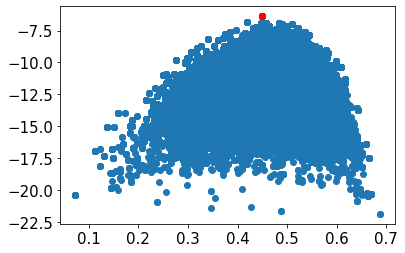

In [12]:
plt.scatter( flat[:,0], probs )
plt.scatter( [ flat[inds,0] ], [ probs[inds] ], color="red" )

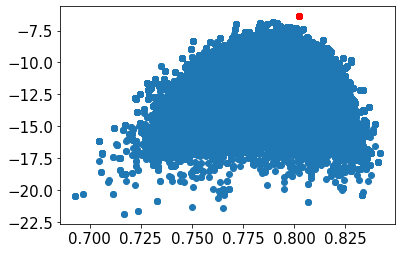

In [13]:
plt.scatter( flat[:,1], probs )
plt.scatter( [ flat[inds,1] ], [ probs[inds] ], color="red" )

In [14]:
data1 = flat
truths1 = flat[inds][0]

## Sample_2

In [15]:
f_name = path_2

In [16]:
readers = []
chains = []
discard = 300
probs = []

runs = 15

for i in range(runs):
    try:
        reader = emcee.backends.HDFBackend( os.path.join(f_name.format(i+1)) )
        chains.append( reader.get_chain(discard=discard, flat=True) )
        probs.append( reader.get_log_prob(discard=discard, flat=True) )
        readers.append( reader )
    except:
        pass
    
flat = np.vstack( chains )
print(len(flat))
#np.save("1HaloParams.npy", res)
sat_str, cen_str = np.mean( flat, axis=0 )
#a = np.mean( flat )
probs = np.hstack(probs)

N = reader.shape[0]

73550


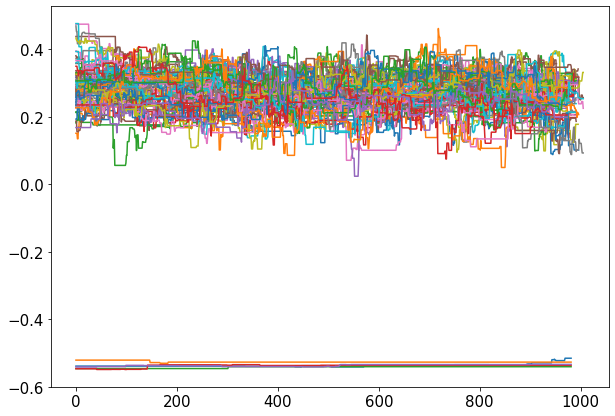

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 7), sharex=True)
#plt.xlim([0,500])

run_num = -1

for run in chains:
    run_num += 1
    for i in range(N):
        single_walker = run[i::N]
        ax.plot(single_walker[:, 0], alpha=1)


Satellite Alignment Strength
0.29675283358689203


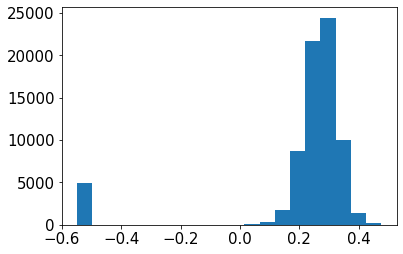

In [18]:
view = flat[:,0]
counts,edges,toss=plt.hist(view,bins=20)
val = max(counts)
ind = np.where( counts == val )[0][0]
print( "Satellite Alignment Strength" )
print( ( edges[ind] + edges[ind+1] )/2 )

Central Alignment Strength
0.6738545937484779


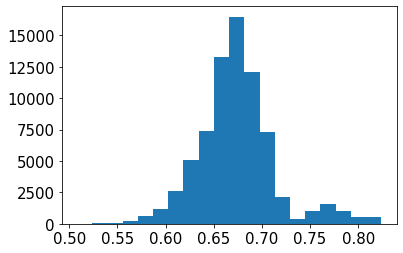

In [19]:
view = flat[:,1]
counts,edges,toss=plt.hist(view,bins=20)
val = max(counts)
ind = np.where( counts == val )[0][0]
print( "Central Alignment Strength" )
print( ( edges[ind] + edges[ind+1] )/2 )

In [20]:
highest = np.max(probs)
ind = 0
for i in range(len(probs)):
    ind = i
    if probs[i] == highest:
        break
print("Matching: ", sum( probs == probs[ind] ))
inds = (probs == probs[ind])
print(probs[ind])
print( np.mean( flat[inds], axis=0 ) )

Matching:  34
-9.578137689628889
[0.27356309 0.68339455]


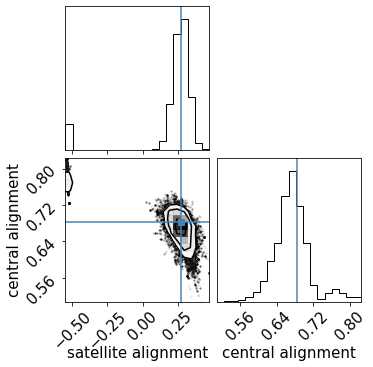

In [21]:
fig = corner.corner(
    #flat, labels=["a","gamma"]
    #flat, labels=["a"]
    flat, labels=["satellite alignment","central alignment"], truths = flat[inds][0]
);

fig.savefig("Sample_2_corner.pdf",dpi=500)

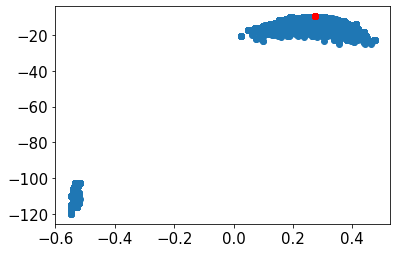

In [22]:
plt.scatter( flat[:,0], probs )
plt.scatter( [ flat[inds,0] ], [ probs[inds] ], color="red" )

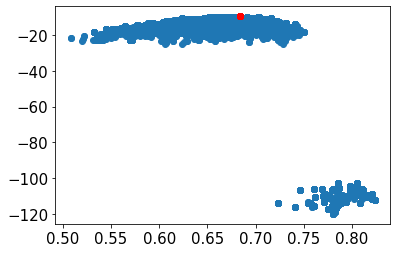

In [23]:
plt.scatter( flat[:,1], probs )
plt.scatter( [ flat[inds,1] ], [ probs[inds] ], color="red" )

In [24]:
data2 = flat
truths2 = flat[inds][0]

## Sample_3

In [25]:
#base = "Versions\\HaloMCMC\\illustris\\subhalo_full_results3\\subhalo_full_results{}"
#path_3 = os.path.join(base.format(str(3)),"MCMC_{}.h5")
f_name = path_3

In [26]:
readers = []
chains = []
discard = 100
probs = []

runs = 15

for i in range(runs):
    try:
        reader = emcee.backends.HDFBackend( os.path.join(f_name.format(i+1)) )
        chains.append( reader.get_chain(discard=discard, flat=True) )
        probs.append( reader.get_log_prob(discard=discard, flat=True) )
        readers.append( reader )
    except:
        pass
    
flat = np.vstack( chains )
print(len(flat))
#np.save("1HaloParams.npy", res)
sat_str, cen_str = np.mean( flat, axis=0 )
#a = np.mean( flat )
probs = np.hstack(probs)

N = reader.shape[0]

26205


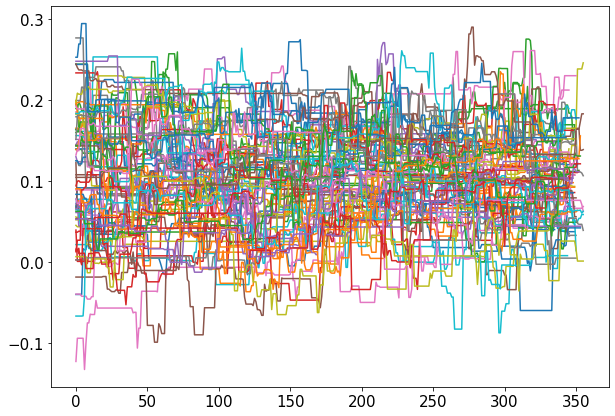

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 7), sharex=True)
#plt.xlim([0,500])

run_num = -1

for run in chains:
    run_num += 1
    for i in range(N):
        single_walker = run[i::N]
        ax.plot(single_walker[:, 0], alpha=1)


Satellite Alignment Strength
0.11267499633391294


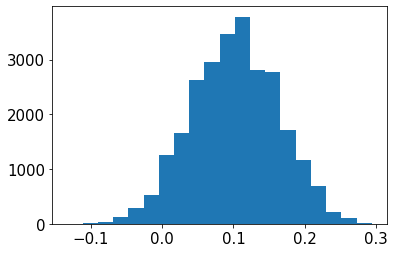

In [28]:
view = flat[:,0]
counts,edges,toss=plt.hist(view,bins=20)
val = max(counts)
ind = np.where( counts == val )[0][0]
print( "Satellite Alignment Strength" )
print( ( edges[ind] + edges[ind+1] )/2 )

Central Alignment Strength
0.5654118597749292


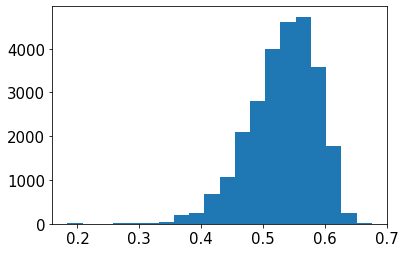

In [29]:
view = flat[:,1]
counts,edges,toss=plt.hist(view,bins=20)
val = max(counts)
ind = np.where( counts == val )[0][0]
print( "Central Alignment Strength" )
print( ( edges[ind] + edges[ind+1] )/2 )

In [30]:
highest = np.max(probs)
ind = 0
for i in range(len(probs)):
    ind = i
    if probs[i] == highest:
        break
print("Matching: ", sum( probs == probs[ind] ))
inds = (probs == probs[ind])
print(probs[ind])
print( np.mean( flat[inds], axis=0 ) )

Matching:  29
-9.498806625559265
[0.11169899 0.52751978]


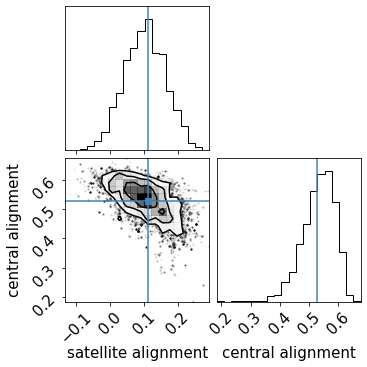

In [31]:
fig = corner.corner(
    #flat, labels=["a","gamma"]
    #flat, labels=["a"]
    flat, labels=["satellite alignment","central alignment"], truths = flat[inds][0]
);

fig.savefig("Sample_3_corner.pdf",dpi=500)

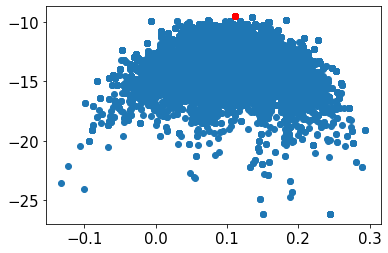

In [32]:
plt.scatter( flat[:,0], probs )
plt.scatter( [ flat[inds,0] ], [ probs[inds] ], color="red" )

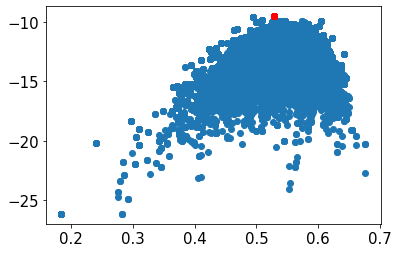

In [33]:
plt.scatter( flat[:,1], probs )
plt.scatter( [ flat[inds,1] ], [ probs[inds] ], color="red" )

In [34]:
data3 = flat
truths3 = flat[inds][0]